# <font color='green'>  Clustering :</font>

- Unsupervised learning.

- The goal is to group similar objects based on features or criteria without any prior labels. (Unlabels) 

**Example:** Grouping customers into clusters based on their spending habits and age without knowing beforehand what these groups might represent (e.g., high spender, low spender).

# <font color='Red'>  Types of Clustering :</font>

**1.** Centroid-Based Clustering (e.g., K-Means)


**2.** Density-Based Clustering (e.g., DBSCAN)


**3.** Hierarchical Clustering


**4.** Model-Based Clustering (e.g., Gaussian Mixture Models - GMM)

# <font color='green'> K-Means Clustering  :</font>

- Centroid-based clustering is a method where the goal is to group data points into clusters, where each cluster is represented by a central point, called a centroid.

- The **centroid** is the average position of all points in a cluster, and the algorithm works by iteratively adjusting these centroids to minimize the distance between the points and their assigned centroid.

- here **"K"** is the number of clusters we want to create.

## How K-Means Works:

- **Step_1** Choose the number of clusters (K), like 2 clusters.


- **Step_2** Pick K random points as the starting "centroids" (the center of each cluster).


- **Step_3** Assign each data point to the closest centroid (based on distance, usually Euclidean).


- **Step_4** Update centroids: For each cluster, find the new center by averaging all the points in that cluster.


- **Step_5** Repeat the process: Reassign points to the new centroids and recalculate centroids until they stop changing or we reach a set number of iterations.

## Elbow Method

- The Elbow Method is a heuristic used to determine the optimal number of clusters in a dataset when using clustering algorithms like K-means.


-  It works by plotting the within-cluster sum of squares (WCSS) in Y axis and number of clusters  K In x axis.

## **The Data**

We will use a data frame with 200 observations on the following 5 variables.

- CustomerID: A unique number or code given to each customer for identification.

- Gender: The customer's gender, usually marked as "Male" or "Female."

- Age: The customer's age in years.

- Annual Income (k$): (e.g., $30,000 is written as 30).

- Spending Score (1-100): A score from 1 to 100 that shows how much a customer spends. Higher scores mean the customer spends more.


### Import Libraries
 
    
    
Import the libraries we usually use for data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
data= pd.read_csv("C:/Users/USER/Desktop/M.L Data Set/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [7]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## EDA

It's time to create some data visualizations

creates a **count plot** that shows the distribution of genders in the data.

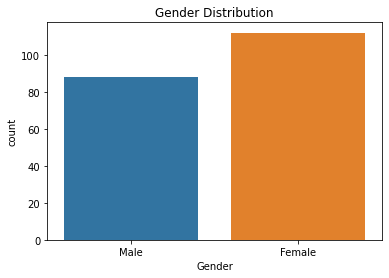

In [8]:
sns.countplot(data['Gender'])
plt.title('Gender Distribution')
plt.show()

creates a distribution plot that shows the distribution of **ages,Annual Income (k$),Spending Score (1-100)** in the dataset

Text(0, 0.5, 'Frequency')

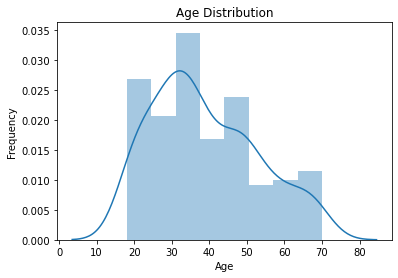

In [9]:
sns.distplot(data['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

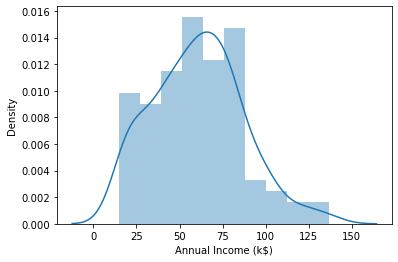

In [10]:
sns.distplot(data['Annual Income (k$)'])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

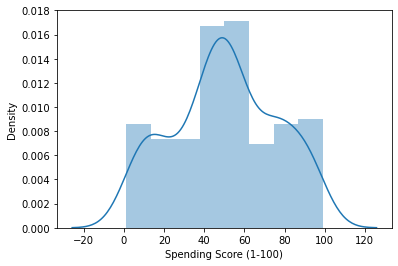

In [11]:
sns.distplot(data['Spending Score (1-100)'])

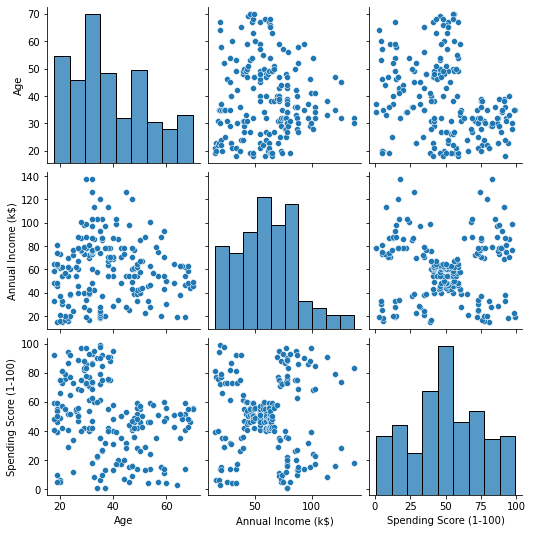

In [12]:
sns.pairplot(data[[ 'Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']])

<AxesSubplot:>

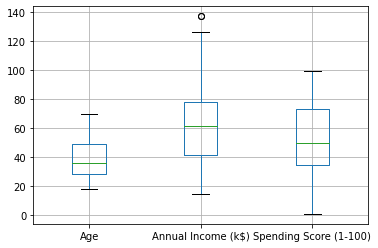

In [13]:
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].boxplot()

Text(0, 0.5, 'Annual Income (k$)')

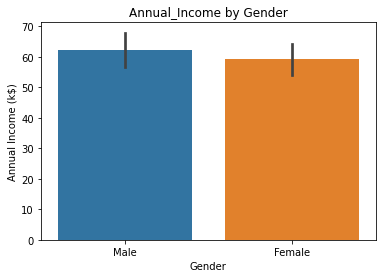

In [14]:
sns.barplot(x='Gender', y='Annual Income (k$)', data=data)
plt.title('Annual_Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')

Text(1.6749999999999972, 0.5, 'Spending Score (1-100)')

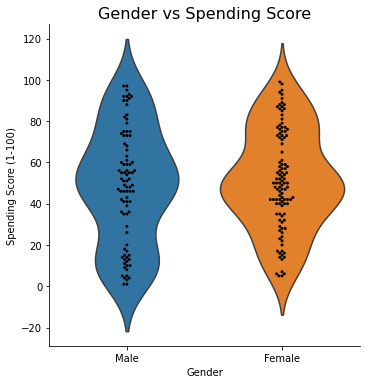

In [15]:
g = sns.catplot(x="Gender", y="Spending Score (1-100)", kind="violin", inner=None, data=data)
sns.swarmplot(x="Gender", y="Spending Score (1-100)", color="k", size=3, data=data, ax=g.ax);
plt.title('Gender vs Spending Score', fontsize = 16)
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')

** Create a scatterplot of Age versus Annual Income (k$) where the points are colored by the Gender. **

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

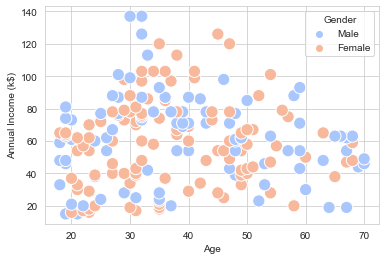

In [16]:
sns.set_style('whitegrid')
sns.scatterplot(x='Age',y='Annual Income (k$)',hue='Gender',data=data,s=150,palette='coolwarm')

** Create a scatterplot of Spending Score (1-100) versus Annual Income (k$) where the points are colored by the Gender. **

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

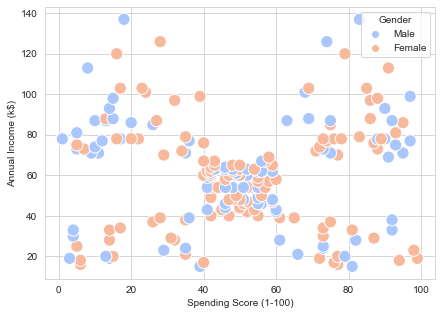

In [17]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Spending Score (1-100)',y='Annual Income (k$)',hue='Gender',data=data,s=150,palette='coolwarm')

In [18]:
df= data.drop('CustomerID',axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**LabelEncoder** the mapping of categories to numerical values is done automatically based on the alphabetical order of the unique values in the column.

- 'Female' = 0, 'Male' = 1

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## K Means Cluster Creation

In [20]:
from sklearn.cluster import KMeans

**Plot Elbow Method For Choosing Value Of K**

In [21]:
cluster_no=[i for i in range(1,12)]
WCSS=[]
for i in cluster_no:
    cluster=KMeans(init='k-means++',n_clusters=i,random_state=42)
    cluster.fit(df)
    WCSS.append(cluster.inertia_)

Text(0, 0.5, 'WCSS')

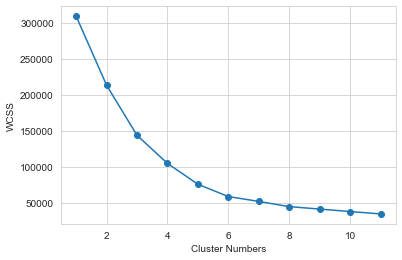

In [22]:
plt.plot(cluster_no,WCSS,marker='o')
plt.xlabel('Cluster Numbers')
plt.ylabel('WCSS')

From the above figure, we can see that Mid most significant slope occurs at k = 4 , hence we will have 4 clusters in this case.

## Model Development

In [23]:
cluster= KMeans(init='k-means++',n_clusters=4,random_state=42)

df['Cluster_No']=cluster.fit_predict(df)

In [24]:
cluster.cluster_centers_

array([[ 0.52631579, 40.39473684, 87.        , 18.63157895],
       [ 0.37894737, 44.89473684, 48.70526316, 42.63157895],
       [ 0.5       , 24.82142857, 28.71428571, 74.25      ],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513]])

In [25]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_No
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,1
3,0,23,16,77,2
4,0,31,17,40,1


In [26]:
print(df['Cluster_No'].value_counts())

1    95
3    39
0    38
2    28
Name: Cluster_No, dtype: int64


In [27]:
# Create separate DataFrames for 0 cluster
cluster_0 = df[df['Cluster_No'] == 0]

# Print 0 cluster DataFrame

print("Cluster 0 Points:")
cluster_0.head()

Cluster 0 Points:


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_No
124,0,23,70,29,0
126,1,43,71,35,0
128,1,59,71,11,0
130,1,47,71,9,0
132,0,25,72,34,0


Analyze how many data points fall into each cluster. This helps you understand if the clusters are balanced or if one is dominating.

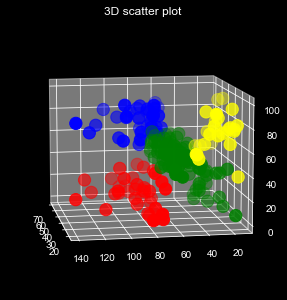

In [28]:
# Creating figure
plt.style.use('dark_background')
fig = plt.figure(figsize = (8, 5))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(df['Age'][df['Cluster_No']==0], df['Annual Income (k$)'][df['Cluster_No']==0], df['Spending Score (1-100)'][df['Cluster_No']==0], c = "red", s=150)
ax.scatter3D(df['Age'][df['Cluster_No']==1], df['Annual Income (k$)'][df['Cluster_No']==1], df['Spending Score (1-100)'][df['Cluster_No']==1], c = "green", s=150)
ax.scatter3D(df['Age'][df['Cluster_No']==2], df['Annual Income (k$)'][df['Cluster_No']==2], df['Spending Score (1-100)'][df['Cluster_No']==2], c = "yellow", s=150)
ax.scatter3D(df['Age'][df['Cluster_No']==3], df['Annual Income (k$)'][df['Cluster_No']==3], df['Spending Score (1-100)'][df['Cluster_No']==3], c = "blue", s=150)
ax.view_init(10, 170)
plt.title("3D scatter plot")
plt.show()

### Result Of Each Clustering.

In [29]:
df.groupby('Cluster_No')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster_No,,,
0,40.394737,87.000000,18.631579
1,44.894737,48.705263,42.631579
2,24.821429,28.714286,74.250000
3,32.692308,86.538462,82.128205


In [30]:
df.groupby('Cluster_No')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].min()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster_No,,,
0,19,70,1
1,18,16,3
2,18,15,39
3,27,69,63


In [31]:
df.groupby('Cluster_No')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].max()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster_No,,,
0,59,137,40
1,70,69,60
2,35,48,99
3,40,137,97


In [32]:
cluster_profile = df.groupby('Cluster_No').agg(['mean', 'median', 'std', 'size'])
print(cluster_profile)

              Gender                              Age                         \
                mean median       std size       mean median        std size   
Cluster_No                                                                     
0           0.526316    1.0  0.506009   38  40.394737   41.5  11.376931   38   
1           0.378947    0.0  0.487699   95  44.894737   48.0  15.341831   95   
2           0.500000    0.5  0.509175   28  24.821429   23.0   5.571446   28   
3           0.461538    0.0  0.505035   39  32.692308   32.0   3.728650   39   

           Annual Income (k$)                        Spending Score (1-100)  \
                         mean median        std size                   mean   
Cluster_No                                                                    
0                   87.000000     80  16.271348   38              18.631579   
1                   48.705263     54  14.522817   95              42.631579   
2                   28.714286     28  10.384

### Davies-Bouldin Index

- Measures average similarity between cluster

- Non-negative, lower is better  (ranges from 0 to ∞ )

- Calculation Based on cluster centroids and their distances
    

In [33]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], df['Cluster_No'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.8914904209843171


A DBI of 0.89149 indicates a good level of separation and compactness in our clusters.